In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from datetime import datetime

In [2]:
def calculateMean(input_list):
    total = 0;
    for x in input_list:
        total += x
    return total / len(input_list)


In [3]:
def calculateSTD(input_list):
    valuesMean = calculateMean(input_list)
    differencesList = []
    for x in input_list:
        differencesList.append((x - valuesMean) ** 2)
    
    return calculateMean(differencesList) ** .5


In [4]:
def extractMonth(input_time):
    date_time = datetime.strptime(input_time, '%m/%d/%y %H:%M')
    return date_time.month
    

In [5]:
def extractHour(input_time):
    date_time = datetime.strptime(input_time, '%m/%d/%y %H:%M')
    return date_time.hour


-0.003204849009165429
-0.0032048490091654462
1.0063997648660554
1.006399764866056


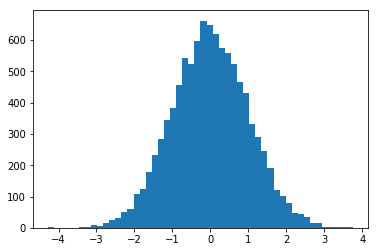

In [6]:
# Testing calculateMean & calculateSTD
list = norm().rvs(10000)

print(calculateMean(list))
print(np.mean(list))
print(calculateSTD(list))
print(np.std(list))

dummyOutput = plt.hist(list, 50)

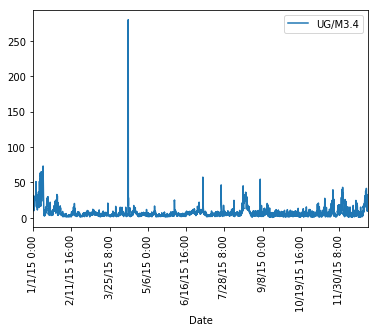

In [7]:
inputFrame = pd.read_csv("2015-PM2.5.csv", skiprows=2, index_col=0)
# print(inputFrame)

workingFrame = inputFrame['UG/M3.4'].to_frame()
# print(workingFrame)

workingFrame.plot(rot=90)

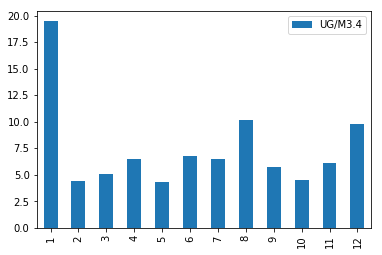

In [8]:
monthFrame = workingFrame.groupby(extractMonth)

monthFrame.mean().plot.bar()
# print(monthFrame)

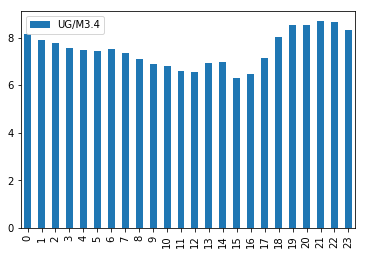

In [9]:
hourFrame = workingFrame.groupby(extractHour)

hourFrame.mean().plot.bar()
# print(hourFrame.describe())
# print(hourFrame)

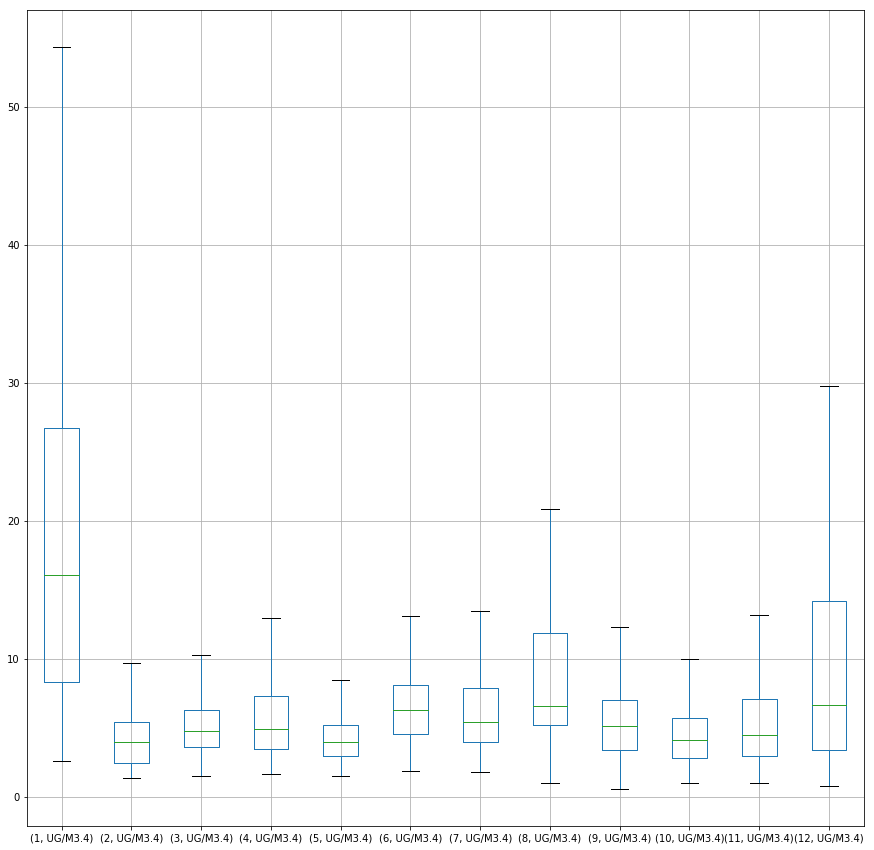

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dummyOutput = monthFrame.boxplot(figsize=(15, 15), showfliers=False, subplots=False)

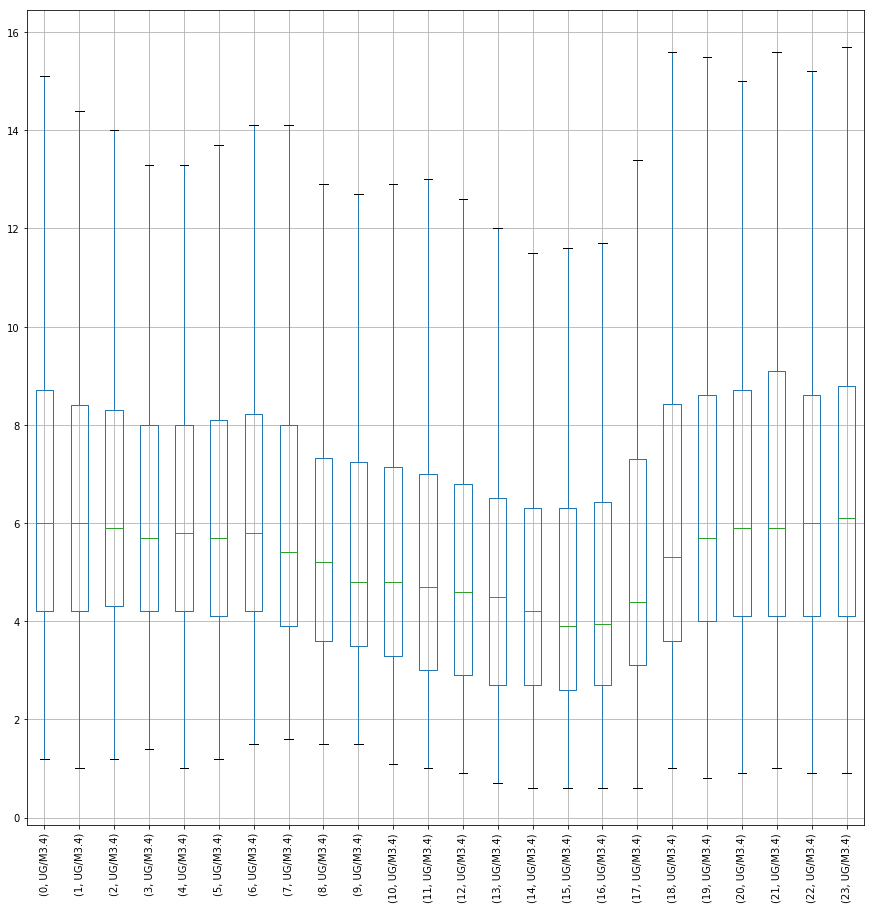

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dummyOutput = hourFrame.boxplot(figsize=(15,15), showfliers=False, subplots=False, rot=90)